---
date: '2023-08-14'
description: Understanding how EMA works with an simulation of a toy model with toy weights
categories:
- tools
- deep learning
- PyTorch
toc: true
output-file: understanding-how-ema-works.html
title: Understanding how EMA works?
---

## Exponential Moving Average (EMA) in Weight Updates

EMA (Exponential Moving Average) is an incredibly useful concept that finds application in various scenarios:

- **Weight Updates**: EMA is used for updating model weights while retaining a historical record of previous weights. This enables the model to blend new information with past knowledge effectively.

- **Self-Supervised Learning**: EMA is commonly employed in Self-Supervised Learning setups. The weights obtained from Self-Supervised Learning are often utilized for downstream tasks like classification and segmentation.

### Clarification on EMA's Impact

Initially, there was a misconception that the EMA process directly impacts the ongoing training of model weights. However, this is not the case. In reality, the EMA process involves the creation of a duplicated set of weights. These duplicate weights are updated alongside the primary training process, and the updated weights are subsequently leveraged for validation purposes. As a result, the overall training procedure remains unaffected by the EMA process.

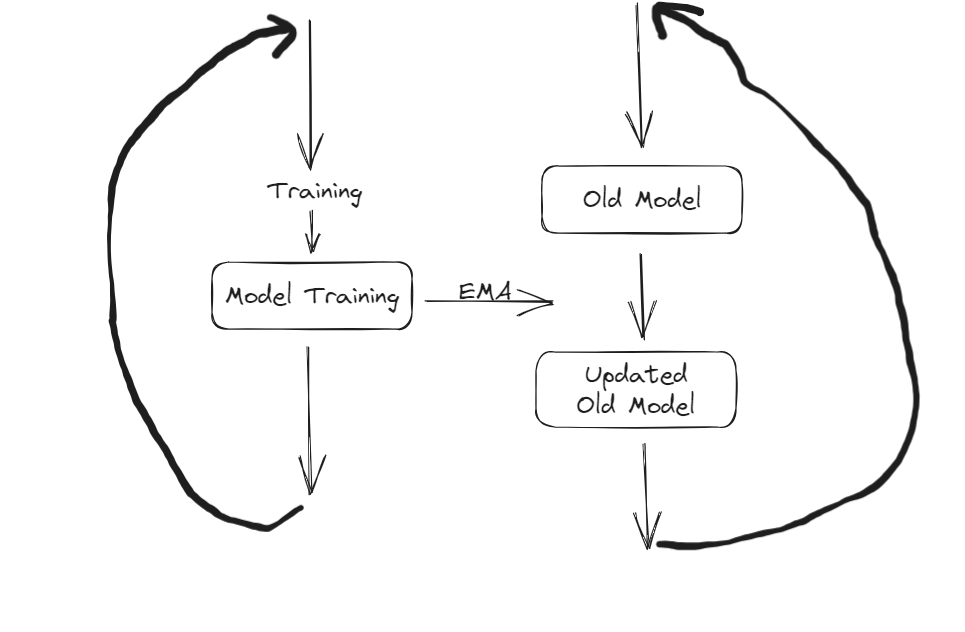

In [1]:
import torch.nn as nn
import torch
from copy import deepcopy

class Model(nn.Module):
    def __init__(self,):
        super().__init__()

        self.layer = nn.Linear(3,3,bias=False)

    def forward(self,x):
        return self.layer(x)
    
@torch.no_grad()
def init_weights_1(m):
    print(m)
    if type(m) == nn.Linear:
        m.weight.fill_(1.0)
        print(m.weight)

@torch.no_grad()
def init_weights_2(m):
    print(m)
    if type(m) == nn.Linear:
        m.weight.fill_(2.0)
        print(m.weight)

In [2]:
teacher = Model().apply(init_weights_1) ## TO BE UPDATED
student = Model().apply(init_weights_2) ## From Training

Linear(in_features=3, out_features=3, bias=False)
Parameter containing:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
Model(
  (layer): Linear(in_features=3, out_features=3, bias=False)
)
Linear(in_features=3, out_features=3, bias=False)
Parameter containing:
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], requires_grad=True)
Model(
  (layer): Linear(in_features=3, out_features=3, bias=False)
)


In [3]:
@torch.no_grad()
def ema_model(teacher_model, student_model,decay=0.5):
    teacher_model.eval()

    for teacher_wt,student_wt in zip(teacher_model.state_dict().values(),student_model.state_dict().values()):
        teacher_wt.copy_(teacher_wt*decay + student_wt*(1-decay))

In [4]:
ema_model(teacher,student)

In [5]:
teacher.state_dict()

OrderedDict([('layer.weight',
              tensor([[1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000],
                      [1.5000, 1.5000, 1.5000]]))])

In [6]:
student.state_dict()

OrderedDict([('layer.weight',
              tensor([[2., 2., 2.],
                      [2., 2., 2.],
                      [2., 2., 2.]]))])